In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

In [2]:
pd.options.display.float_format = "{:,.2f}".format

### Generator IDs

In [3]:
gen_id = pd.read_csv('datasets/cleaned/generators_updated.csv', 
            usecols=['Resource Name', 'grid', 'CLASS', 'SUBTYPE', 'TYPE', 'YEARS_COMMISSIONED', 'DATE_COMMISSIONED'])
gen_id['DATE_COMMISSIONED'] = pd.to_datetime(gen_id['DATE_COMMISSIONED'])
gen_id.head()

,Resource Name,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED
0,1ACNPC_G01,LUZON,GRID CONNECTED,BIOMASS,Biogas,2017-07-01,4.00
1,1AMBUK_U01,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1956-12-01,64.00
2,1AMBUK_U02,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1956-12-01,64.00
3,1AMBUK_U03,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1956-12-01,64.00
4,1AMPHAW_G01,LUZON,GRID CONNECTED,SMALL HYDROELECTRIC,Run-of-River type HEPP,1991-08-01,29.00


### Generation Loading Datasets

In [4]:
df = pd.read_csv('datasets/cleaned/MW-ante-post.csv')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df.head()

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post
0,2009-12-26,0,1AEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00
1,2009-12-26,0,1ANGAT_A,2009-12-26,25.00,0.00,138.89,24.30,-10.00,135.00
2,2009-12-26,0,1ANGAT_M,2009-12-26,5.00,0.00,2.50,5.00,-10.00,2.50
3,2009-12-26,0,1APEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00
4,2009-12-26,0,1BAKUN_G01,2009-12-26,0.80,0.00,1.05,0.80,-10.12,1.05


### Installed Plant Capacity

In [5]:
installed_capacity = pd.read_csv('datasets/cleaned/installed_capacity.csv',
                                usecols=['Resource Name', 'MW_installed'])
installed_capacity.head()

,Resource Name,MW_installed
0,1ACNPC_G01,1.70
1,1AMBUK_U01,35.00
2,1AMBUK_U02,35.00
3,1AMBUK_U03,35.00
4,1AMPHAW_G01,12.50


### Merge Dataframes

In [6]:
datasets = pd.merge(df, gen_id, 
                    left_on='RESOURCE_NAME', 
                    right_on='Resource Name', 
                    how='left').drop('Resource Name', axis=1)

In [7]:
datasets = pd.merge(datasets, installed_capacity, 
                    left_on='RESOURCE_NAME', 
                    right_on='Resource Name',
                    how='left').rename(columns={'MW':'MW_installed'})
display(datasets)

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed
0,2009-12-26,0,1AEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,NaN,NaN,NaN,NaN,NaT,NaN,1AEC_G01,27.50
1,2009-12-26,0,1ANGAT_A,2009-12-26 00:00:00,25.00,0.00,138.89,24.30,-10.00,135.00,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1986-06-01,35.00,1ANGAT_A,18.00
2,2009-12-26,0,1ANGAT_M,2009-12-26 00:00:00,5.00,0.00,2.50,5.00,-10.00,2.50,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Dam-type HEPP,1967-10-01,53.00,1ANGAT_M,200.00
3,2009-12-26,0,1APEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00
4,2009-12-26,0,1BAKUN_G01,2009-12-26 00:00:00,0.80,0.00,1.05,0.80,-10.12,1.05,LUZON,GRID CONNECTED,LARGE HYDROELECTRIC,Run-of-River type HEPP,2000-11-01,20.00,1BAKUN_G01,76.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22459343,2021-06-25,19,3BACMAN_U03,2021-06-25 19:00:00,19.00,"4,633.86",95.00,19.00,"4,637.31",95.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00
22459344,2021-06-25,20,3BACMAN_U03,2021-06-25 20:00:00,0.00,"13,556.49",0.00,9.00,"11,316.27",45.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00
22459345,2021-06-25,21,3BACMAN_U03,2021-06-25 21:00:00,9.00,"8,095.88",45.00,9.00,"7,981.14",45.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00
22459346,2021-06-25,22,3BACMAN_U03,2021-06-25 22:00:00,19.00,"3,625.97",95.00,19.00,"3,600.83",95.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00


In [8]:
# datasets[(datasets['RESOURCE_NAME']=='1CONSOL_G01') & (datasets['DELIVERY_HOUR']==13)]

### Filtering

In [9]:
baseloads = ['COAL', 'NATURAL GAS', 'GEOTHERMAL'] #Set all types of plant to be considered
df_baseloads = datasets[datasets['TYPE'].isin(baseloads)].copy()

In [12]:
variables = ['LARGE HYDROELECTRIC', 'DIESEL', 'BIOMASS',
             'WIND', 'SMALL HYDROELECTRIC', 'MINI HYDROELECTRIC',
             'OIL THERMAL', 'MICRO HYDROELECTRIC', 'GAS TURBINE']
df_variables = datasets[datasets['TYPE'].isin(variables)].copy()

In [13]:
solar = ['SOLAR']
df_solar = datasets[datasets['TYPE'].isin(solar)].copy()

In [14]:
def visualize(resource_id):
    datasets[datasets['RESOURCE_NAME']==resource_id][['DATE_TIME', 'MW_post']].set_index(['DATE_TIME']).plot(figsize=(20,6))

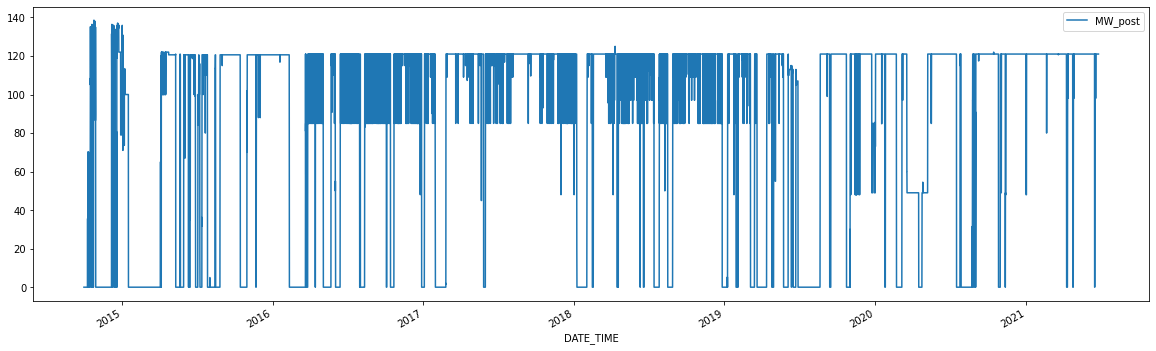

In [15]:
visualize('3SLTEC_G01')

### Removing Commissioning stage data
Based on date commissioned in generators_updated file

In [59]:
df_op = df_baseloads[df_baseloads['DELIVERY_DATE'] >= df_baseloads['DATE_COMMISSIONED']]

In [15]:
#df_op[df_op['RESOURCE_NAME'] == '3SLTEC_G01']

In [16]:
df_op.head()

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed
3,2009-12-26,0,1APEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00
14,2009-12-26,0,1MSINLO_G01,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G01,315.00
15,2009-12-26,0,1MSINLO_G02,2009-12-26,80.00,0.00,23.26,80.00,-9.96,23.26,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G02,344.00
22,2009-12-26,0,1SUAL_G01,2009-12-26,225.00,0.00,34.78,225.00,-9.97,34.78,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G01,647.00
23,2009-12-26,0,1SUAL_G02,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00


### Removing 2-8 week consecutive outage interval for Coal
Assuming more than 2 or less than 8 week outages are planned

In [52]:
#using this number to remove entries based on consecutive outage count
n_max = 6*7*24
n_min = 2*7*24

baseload_resource = df_baseloads["RESOURCE_NAME"].unique()
baseload_resource

array(['1APEC_G01', '1MSINLO_G01', '1MSINLO_G02', '1SUAL_G01',
       '1SUAL_G02', '3CALACA_G01', '3CALACA_G02', '3ILIJAN_G01',
       '3ILIJAN_G02', '3MKBN_A', '3MKBN_B', '3MKBN_C', '3MKBN_D',
       '3MKBN_E', '3ORMAT_G01', '3PAGBIL_G01', '3PAGBIL_G02', '3QPPL_G01',
       '3STA-RI_G01', '3STA-RI_G02', '3STA-RI_G03', '3STA-RI_G04',
       '3STA-RI_G05', '3STA-RI_G06', '3TIWI_A', '3TIWI_B', '3TIWI_C',
       '4LEYTE_A', '4LGPP_G01', '6PAL1A_G01', '5KSPC_G01', '5TPC_G02',
       '5KSPC_G02', '1MARVEL_G01', '1MARVEL_G02', '1PETRON_G01',
       '3MGPP_G01', '6PAL2A_U01', '6PAL2A_U02', '6PAL2A_U03',
       '6PAL2A_U04', '5CEDC_U01', '5CEDC_U02', '5CEDC_U03', '8PEDC_U01',
       '8PEDC_U02', '6NASULO_G01', '3SLTEC_G01', '3SLTEC_G02',
       '3SLPGC_G01', '3SLPGC_G02', '1ANDA_G01', '3SNGAB_G01', '8PALM_G01',
       '8PEDC_U03', '1SMC_G01', '3AVION_U01', '3AVION_U02', '1UPPC_G01',
       '1SMC_G02', '3PAGBIL_G03', '1SMC_G03', '3MGI_G02', '5THVI_U01',
       '5THVI_U02', '1SMC_G04', '1MSINLO_

In [53]:
print(n_max)
print(n_min)

1008
336


In [60]:
df_copy = df_op.copy()
df_copy.loc[:,('OUTAGE_BINARY')] = np.where(df_op['MW_post'] <= 0.5, 1, 0)
df_op = df_copy.copy()
df_op.head(10)

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY
3,2009-12-26,0,1APEC_G01,2009-12-26,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1
14,2009-12-26,0,1MSINLO_G01,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G01,315.00,1
15,2009-12-26,0,1MSINLO_G02,2009-12-26,80.00,0.00,23.26,80.00,-9.96,23.26,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G02,344.00,0
22,2009-12-26,0,1SUAL_G01,2009-12-26,225.00,0.00,34.78,225.00,-9.97,34.78,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G01,647.00,0
23,2009-12-26,0,1SUAL_G02,2009-12-26,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1
31,2009-12-26,0,3CALACA_G01,2009-12-26,0.00,0.00,0.00,0.00,-9.70,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1984-09-01,36.00,3CALACA_G01,300.00,1
32,2009-12-26,0,3CALACA_G02,2009-12-26,0.00,0.00,0.00,0.00,-9.70,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1984-09-01,36.00,3CALACA_G02,300.00,1
34,2009-12-26,0,3ILIJAN_G01,2009-12-26,493.00,0.00,82.17,492.90,-9.84,82.15,LUZON,GRID CONNECTED,NATURAL GAS,Combined Cycle Gas Turbine\n(CCGT),2002-06-01,19.00,3ILIJAN_G01,600.00,0
35,2009-12-26,0,3ILIJAN_G02,2009-12-26,494.80,0.00,82.47,492.90,-9.84,82.15,LUZON,GRID CONNECTED,NATURAL GAS,Combined Cycle Gas Turbine\n(CCGT),2002-06-01,19.00,3ILIJAN_G02,600.00,0
43,2009-12-26,0,3MKBN_A,2009-12-26,31.00,0.00,24.60,31.00,-9.94,24.60,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1979-04-01,42.00,3MKBN_A,126.00,0


In [61]:
d = {}
for name in baseload_resource:
    d[name] = df_op[df_op["RESOURCE_NAME"] == name]

for name, ddf_op in d.items():
    ddf_copy = ddf_op.copy()
    y = ddf_op["OUTAGE_BINARY"].copy()
    ddf_copy.loc[ :, ("OUTAGE_COUNT")] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
    ddf_copy.loc[ :, ("CONSECUTIVE_COUNT")] = ((y != y.shift()).cumsum())
    d[name] = ddf_copy
    
#Getting a database of CONSECUTIVE_COUNTs with max OUTAGE_COUNT where OUTAGE_COUNT is between n_min & n_max  
d_outage = {}

for name, ddf_op in d.items():
    ddf_copy = ddf_op.copy()
    ind_list = ddf_copy.reset_index().groupby(['CONSECUTIVE_COUNT'])['OUTAGE_COUNT'].idxmax()
    ddf_outage = ddf_copy.iloc[ind_list, :]
    ddf_outage = ddf_outage[ddf_outage['OUTAGE_BINARY'] == 1]
    ddf_outage = ddf_outage[(ddf_outage['OUTAGE_COUNT'] > n_min) & (ddf_outage['OUTAGE_COUNT'] < n_max)]
    d_outage[name] = ddf_outage

In [62]:
d_outage['1SUAL_G02']

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,...,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY,OUTAGE_COUNT,CONSECUTIVE_COUNT
148943,2010-02-09,22,1SUAL_G02,2010-02-09 22:00:00,0.00,"800,000.00",0.00,0.00,"10,680.69",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,767,3
2046036,2011-08-20,2,1SUAL_G02,2011-08-20 02:00:00,0.00,"2,080.46",0.00,0.00,"2,080.49",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,700,33
3457056,2012-09-17,2,1SUAL_G02,2012-09-17 02:00:00,0.00,"2,020.66",0.00,0.00,"1,999.88",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,723,61
4742897,2013-09-01,15,1SUAL_G02,2013-09-01 15:00:00,0.00,"1,862.23",0.00,0.00,"1,834.95",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,712,71
6416808,2014-09-29,2,1SUAL_G02,2014-09-29 02:00:00,0.00,"1,814.92",0.00,0.00,"1,814.55",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,724,79
10308047,2016-09-16,7,1SUAL_G02,2016-09-16 07:00:00,0.00,"2,047.97",0.00,0.00,"2,126.69",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,488,111
13501106,2018-02-09,16,1SUAL_G02,2018-02-09 16:00:00,0.00,"4,120.41",0.00,0.00,"4,116.25",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,522,131
15436327,2018-12-04,3,1SUAL_G02,2018-12-04 03:00:00,0.00,"2,764.07",0.00,0.00,"2,765.22",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,413,153
17787862,2019-11-14,17,1SUAL_G02,2019-11-14 17:00:00,0.00,"6,544.96",0.00,0.00,"6,745.80",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,592,167
21984058,2021-06-02,13,1SUAL_G02,2021-06-02 13:00:00,0.00,"19,685.93",0.00,0.00,"8,812.08",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,422,185


In [63]:
#Removing Outage intervals based on the CONSECUTIVE_COUNT
for (name, ddf_op), (name, ddf_outage) in zip(d.items(), d_outage.items()):
    CC_list = ddf_outage['CONSECUTIVE_COUNT']
    d[name] = ddf_op[~ddf_op.CONSECUTIVE_COUNT.isin(CC_list)]

In [64]:
d['1SUAL_G02']

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,...,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY,OUTAGE_COUNT,CONSECUTIVE_COUNT
23,2009-12-26,0,1SUAL_G02,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-9.97,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,1,1
159,2009-12-26,1,1SUAL_G02,2009-12-26 01:00:00,0.00,-207.21,0.00,0.00,-207.29,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,2,1
295,2009-12-26,2,1SUAL_G02,2009-12-26 02:00:00,0.00,-500.88,0.00,0.00,"-5,095.88",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,3,1
431,2009-12-26,3,1SUAL_G02,2009-12-26 03:00:00,0.00,"-5,093.57",0.00,0.00,"-5,073.89",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,4,1
567,2009-12-26,4,1SUAL_G02,2009-12-26 04:00:00,0.00,-206.48,0.00,0.00,-205.99,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155887,2021-06-25,19,1SUAL_G02,2021-06-25 19:00:00,580.00,"4,489.71",89.64,580.00,"4,496.15",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186
22156197,2021-06-25,20,1SUAL_G02,2021-06-25 20:00:00,580.00,"13,232.65",89.64,580.00,"11,126.50",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186
22156507,2021-06-25,21,1SUAL_G02,2021-06-25 21:00:00,580.00,"7,940.28",89.64,580.00,"7,818.33",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186
22156817,2021-06-25,22,1SUAL_G02,2021-06-25 22:00:00,580.00,"3,570.16",89.64,580.00,"3,546.57",89.64,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,0,0,186


In [65]:
d['1SUAL_G02'].CONSECUTIVE_COUNT.unique()

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  73,  74,  75,  76,  77,  78,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186])

In [66]:
df_op

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,grid,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY
3,2009-12-26,0,1APEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1
14,2009-12-26,0,1MSINLO_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G01,315.00,1
15,2009-12-26,0,1MSINLO_G02,2009-12-26 00:00:00,80.00,0.00,23.26,80.00,-9.96,23.26,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1998-06-01,23.00,1MSINLO_G02,344.00,0
22,2009-12-26,0,1SUAL_G01,2009-12-26 00:00:00,225.00,0.00,34.78,225.00,-9.97,34.78,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G01,647.00,0
23,2009-12-26,0,1SUAL_G02,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-9.97,0.00,LUZON,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,1999-10-01,21.00,1SUAL_G02,647.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22459343,2021-06-25,19,3BACMAN_U03,2021-06-25 19:00:00,19.00,"4,633.86",95.00,19.00,"4,637.31",95.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0
22459344,2021-06-25,20,3BACMAN_U03,2021-06-25 20:00:00,0.00,"13,556.49",0.00,9.00,"11,316.27",45.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0
22459345,2021-06-25,21,3BACMAN_U03,2021-06-25 21:00:00,9.00,"8,095.88",45.00,9.00,"7,981.14",45.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0
22459346,2021-06-25,22,3BACMAN_U03,2021-06-25 22:00:00,19.00,"3,625.97",95.00,19.00,"3,600.83",95.00,LUZON,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0


In [67]:
appended_data = []
for name, df in d.items():
    appended_data.append(df)
    
df_op = pd.concat(appended_data)
df_op

,DELIVERY_DATE,DELIVERY_HOUR,RESOURCE_NAME,DATE_TIME,MW_ante,PRICE_ante,MW_loading_ante,MW_post,PRICE_post,MW_loading_post,...,CLASS,TYPE,SUBTYPE,DATE_COMMISSIONED,YEARS_COMMISSIONED,Resource Name,MW_installed,OUTAGE_BINARY,OUTAGE_COUNT,CONSECUTIVE_COUNT
3,2009-12-26,0,1APEC_G01,2009-12-26 00:00:00,0.00,0.00,0.00,0.00,-10.13,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,1,1
139,2009-12-26,1,1APEC_G01,2009-12-26 01:00:00,0.00,-210.46,0.00,0.00,-210.55,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,2,1
275,2009-12-26,2,1APEC_G01,2009-12-26 02:00:00,0.00,-508.61,0.00,0.00,"-5,174.35",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,3,1
411,2009-12-26,3,1APEC_G01,2009-12-26 03:00:00,0.00,"-5,171.90",0.00,0.00,"-5,151.15",0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,4,1
547,2009-12-26,4,1APEC_G01,2009-12-26 04:00:00,0.00,-209.66,0.00,0.00,-209.13,0.00,...,GRID CONNECTED,COAL,Pulvurized Sub Critical Coal,2006-07-01,15.00,1APEC_G01,52.00,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22459343,2021-06-25,19,3BACMAN_U03,2021-06-25 19:00:00,19.00,"4,633.86",95.00,19.00,"4,637.31",95.00,...,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0,0,272
22459344,2021-06-25,20,3BACMAN_U03,2021-06-25 20:00:00,0.00,"13,556.49",0.00,9.00,"11,316.27",45.00,...,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0,0,272
22459345,2021-06-25,21,3BACMAN_U03,2021-06-25 21:00:00,9.00,"8,095.88",45.00,9.00,"7,981.14",45.00,...,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0,0,272
22459346,2021-06-25,22,3BACMAN_U03,2021-06-25 22:00:00,19.00,"3,625.97",95.00,19.00,"3,600.83",95.00,...,GRID CONNECTED,GEOTHERMAL,Single Flash,1993-09-01,27.00,3BACMAN_U03,20.00,0,0,272


## Aggregating Monthly Availability per Plant

In [68]:
def availability_factor_baseloads(x):
    try:
        return len(x[x > 0.5]) / len(x) * 100
    except:
        return 0
    
def availability_factor_variables(x):
    try:
        return len(x[x != 0]) / len(x) * 100
    except:
        return 0

In [69]:
a_rate = (df_op.groupby(['grid', 'CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME', 
                         df_op['DATE_TIME'].dt.year,
                         df_op['DATE_TIME'].dt.month, 
                         df_op['DATE_TIME'].dt.isocalendar().week])['MW_post']
                                .apply(availability_factor_baseloads).to_frame())
a_rate = (a_rate.reset_index(level = [0,1,2,3,4,5,6,7]).rename(columns = {'DATE_TIME':'YEAR'})
    .reset_index().rename(columns ={'DATE_TIME':'MONTH', 'MW_post':'AVAIL_RATE'}))

a_rate['SUBTYPE'] = a_rate['SUBTYPE'].replace(r'\n', ' ', regex = True)

a_rate['YR_MONTH'] = a_rate['YEAR'].astype(str) + "-" + a_rate['MONTH'].astype(str)
a_rate['YR_MONTH'] = pd.to_datetime(a_rate['YR_MONTH'], format = '%Y-%m')

a_rate

,MONTH,week,grid,CLASS,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,YEAR,AVAIL_RATE,YR_MONTH
0,5,18,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,100.00,2013-05-01
1,5,19,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,99.40,2013-05-01
2,5,20,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,95.78,2013-05-01
3,5,21,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,99.40,2013-05-01
4,5,22,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013,100.00,2013-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
35657,5,22,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021,100.00,2021-05-01
35658,6,22,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021,100.00,2021-06-01
35659,6,23,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021,100.00,2021-06-01
35660,6,24,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021,100.00,2021-06-01


#### Month

In [70]:
a_rate_month = (a_rate.groupby(['grid', 'CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME', 'YR_MONTH', 'YEAR', 'MONTH'])['AVAIL_RATE']
                                .mean().to_frame()).reset_index()

In [71]:
a_rate_month_q2 = a_rate_month[(a_rate_month['MONTH'] < 7) & (a_rate_month['MONTH'] > 3)]

#### Week

In [72]:
a_rate_week = (a_rate.groupby(['grid', 'CLASS', 'TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'RESOURCE_NAME', 'YR_MONTH', 'YEAR', 'MONTH', 'week'])['AVAIL_RATE']
                                .mean().to_frame()).reset_index()

In [73]:
a_rate_week_q2 = a_rate_week[(a_rate_week['MONTH'] < 7) & (a_rate_week['MONTH'] > 3)]
a_rate_week_q2

,grid,CLASS,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,YR_MONTH,YEAR,MONTH,week,AVAIL_RATE
0,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013-05-01,2013,5,18,100.00
1,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013-05-01,2013,5,19,99.40
2,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013-05-01,2013,5,20,95.78
3,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013-05-01,2013,5,21,99.40
4,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2013-05-01,2013,5,22,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
35657,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021-05-01,2021,5,22,100.00
35658,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021-06-01,2021,6,22,100.00
35659,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021-06-01,2021,6,23,100.00
35660,VISAYAS,GRID CONNECTED,GEOTHERMAL,Single Flash/Double Flash/ Binary/Combined Cycle,25.00,538.00,4LEYTE_A,2021-06-01,2021,6,24,100.00


# Mean Method
Just taking the Average availability rates by varying categories

### Aggregating Average Availability BY TYPE, TOTAL DATA

In [74]:
cm = sns.light_palette("blue", as_cmap=True)

In [75]:
a_rate_01 = (df_op.groupby(['TYPE'])['MW_post']
                                .apply(availability_factor_baseloads).to_frame()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE'}).reset_index())
a_rate_01.style.background_gradient(cmap=cm)

,TYPE,AVAIL_RATE
0,COAL,82.281749
1,GEOTHERMAL,76.054519
2,NATURAL GAS,88.499026


### Aggregating Average Availability BY TYPE, Q2

In [76]:
a_rate_02 = (df_op.groupby(['TYPE',df_op['DATE_TIME'].dt.month])['MW_post']
                                .apply(availability_factor_baseloads).to_frame().reset_index()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE','DATE_TIME':'MONTH'}))
a_rate_02 = a_rate_02[(a_rate_02['MONTH'] < 7) & (a_rate_02['MONTH'] > 3)]
a_rate_02.style.background_gradient(cmap=cm)

,TYPE,MONTH,AVAIL_RATE
3,COAL,4,83.317090
4,COAL,5,84.889983
5,COAL,6,85.485702
15,GEOTHERMAL,4,75.618264
16,GEOTHERMAL,5,77.626256
17,GEOTHERMAL,6,76.930562
27,NATURAL GAS,4,90.559740
28,NATURAL GAS,5,92.393571
29,NATURAL GAS,6,90.106927


### Aggregating Average Availability BY TYPE, Q2 WEEKS

In [78]:
a_rate_03 = (df_op.groupby(['TYPE',df_op['DATE_TIME'].dt.month, df_op['DATE_TIME'].dt.isocalendar().week])['MW_post']
                                .apply(availability_factor_baseloads).to_frame().reset_index()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE','DATE_TIME':'MONTH'}))
a_rate_03 = a_rate_03[(a_rate_03['MONTH'] < 7) & (a_rate_03['MONTH'] > 3)]
a_rate_03.style.background_gradient(cmap=cm)

,TYPE,MONTH,week,AVAIL_RATE
18,COAL,4,13,83.036603
19,COAL,4,14,81.966937
20,COAL,4,15,82.984346
21,COAL,4,16,85.111774
22,COAL,4,17,84.135903
23,COAL,4,18,79.274408
24,COAL,5,17,85.274801
25,COAL,5,18,86.308150
26,COAL,5,19,84.898537
27,COAL,5,20,84.852158


### Aggregating Average Availability BY SUBTYPE, TOTAL DATA 

In [79]:
a_rate_11 = (df_op.groupby(['SUBTYPE'])['MW_post']
                                .apply(availability_factor_baseloads).to_frame()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE'}).reset_index())
a_rate_11.style.background_gradient(cmap=cm)

,SUBTYPE,AVAIL_RATE
0,Binary,27.613345
1,Circularized Fluidized Bed (CFB) Coal Co-generation,0.004985
2,Circulating Fluidized Bed (CFB) Coal,81.839670
3,Combined Cycle Gas Turbine (CCGT),93.788881
4,Open Cycle Gas Turbine (OCGT),32.052613
5,Pulvurized Sub Critical Coal,85.103355
6,Single Flash,77.547613
7,Single Flash/Double Flash/ Binary/Combined Cycle,99.686030
8,Super Critical Coal,86.580863


### Aggregating Average Availability BY SUBTYPETYPE, Q2 

In [80]:
a_rate_12 = (df_op.groupby(['SUBTYPE',df_op['DATE_TIME'].dt.month])['MW_post']
                                .apply(availability_factor_baseloads).to_frame().reset_index()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE','DATE_TIME':'MONTH'}))
a_rate_12 = a_rate_12[(a_rate_12['MONTH'] < 7) & (a_rate_12['MONTH'] > 3)]
a_rate_12.style.background_gradient(cmap=cm)

,SUBTYPE,MONTH,AVAIL_RATE
3,Binary,4,29.971014
4,Binary,5,28.720422
5,Binary,6,23.320808
15,Circularized Fluidized Bed (CFB) Coal Co-generation,4,0.000000
16,Circularized Fluidized Bed (CFB) Coal Co-generation,5,0.000000
17,Circularized Fluidized Bed (CFB) Coal Co-generation,6,0.000000
27,Circulating Fluidized Bed (CFB) Coal,4,81.643152
28,Circulating Fluidized Bed (CFB) Coal,5,83.982604
29,Circulating Fluidized Bed (CFB) Coal,6,84.393384
39,Combined Cycle Gas Turbine (CCGT),4,94.864538


### Aggregating Average Availability BY SUBTYPE, Q2 WEEKS

In [81]:
a_rate_13 = (df_op.groupby(['SUBTYPE',df_op['DATE_TIME'].dt.month, df_op['DATE_TIME'].dt.isocalendar().week])['MW_post']
                                .apply(availability_factor_baseloads).to_frame().reset_index()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE','DATE_TIME':'MONTH'}))
a_rate_13 = a_rate_13[(a_rate_13['MONTH'] < 7) & (a_rate_13['MONTH'] > 3)]
a_rate_13.style.background_gradient(cmap=cm)

,SUBTYPE,MONTH,week,AVAIL_RATE
18,Binary,4,13,16.666667
19,Binary,4,14,26.490765
20,Binary,4,15,30.830433
21,Binary,4,16,32.373386
22,Binary,4,17,33.190349
23,Binary,4,18,29.411765
24,Binary,5,17,20.833333
25,Binary,5,18,30.242688
26,Binary,5,19,33.333333
27,Binary,5,20,30.218688


### Aggregating Average Availability BY RESOURCE NAME, TOTAL DATA 

In [82]:
a_rate_21 = (df_op.groupby(['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed','RESOURCE_NAME'])['MW_post']
                                .apply(availability_factor_baseloads).to_frame()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE'}).reset_index())
a_rate_21.style.background_gradient(cmap=cm)

,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,AVAIL_RATE
0,Binary,42.000000,6.000000,3ORMAT_G01,27.613345
1,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,0.004985
2,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,5THVI_U02,87.257717
3,Circulating Fluidized Bed (CFB) Coal,2.000000,150.000000,1SMC_G04,88.847009
4,Circulating Fluidized Bed (CFB) Coal,2.000000,176.200000,5THVI_U01,90.030530
5,Circulating Fluidized Bed (CFB) Coal,3.000000,150.000000,1SMC_G02,95.642815
6,Circulating Fluidized Bed (CFB) Coal,3.000000,150.000000,1SMC_G03,90.226519
7,Circulating Fluidized Bed (CFB) Coal,4.000000,72.000000,1ANDA_G01,90.507162
8,Circulating Fluidized Bed (CFB) Coal,4.000000,135.000000,8PALM_G01,96.915911
9,Circulating Fluidized Bed (CFB) Coal,4.000000,150.000000,1SMC_G01,90.908013


### Aggregating Average Availability BY RESOURCE NAME, Q2

In [83]:
a_rate_22 = (df_op.groupby(['TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED' , 'MW_installed', 'RESOURCE_NAME',df_op['DATE_TIME'].dt.month])['MW_post']
                                .apply(availability_factor_baseloads).to_frame().reset_index()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE','DATE_TIME':'MONTH'}))
a_rate_22 = a_rate_22[(a_rate_22['MONTH'] < 7) & (a_rate_22['MONTH'] > 3)]
a_rate_22.style.background_gradient(cmap=cm)

,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,MONTH,AVAIL_RATE
3,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,0.000000
4,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,5,0.000000
5,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,6,0.000000
15,COAL,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,5THVI_U02,4,99.797980
16,COAL,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,5THVI_U02,5,100.000000
17,COAL,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,5THVI_U02,6,60.456274
27,COAL,Circulating Fluidized Bed (CFB) Coal,2.000000,150.000000,1SMC_G04,4,50.000000
28,COAL,Circulating Fluidized Bed (CFB) Coal,2.000000,150.000000,1SMC_G04,5,73.118280
29,COAL,Circulating Fluidized Bed (CFB) Coal,2.000000,150.000000,1SMC_G04,6,99.392559
39,COAL,Circulating Fluidized Bed (CFB) Coal,2.000000,176.200000,5THVI_U01,4,93.237610


### Aggregating Average Availability BY RESOURCE_NAME, Q2 WEEKS

In [84]:
a_rate_23 = (df_op.groupby(['TYPE', 'SUBTYPE', 'YEARS_COMMISSIONED' , 'MW_installed', 'RESOURCE_NAME',df_op['DATE_TIME'].dt.month, df_op['DATE_TIME'].dt.isocalendar().week])['MW_post']
                                .apply(availability_factor_baseloads).to_frame().reset_index()
                                .rename(columns ={ 'MW_post':'AVAIL_RATE','DATE_TIME':'MONTH'}))
a_rate_23 = a_rate_23[(a_rate_23['MONTH'] < 7) & (a_rate_23['MONTH'] > 3)]
a_rate_23.style.background_gradient(cmap=cm)

,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,MONTH,week,AVAIL_RATE
18,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,13,0.000000
19,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,14,0.000000
20,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,15,0.000000
21,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,16,0.000000
22,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,17,0.000000
23,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,4,18,0.000000
24,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,5,17,0.000000
25,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,5,18,0.000000
26,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,5,19,0.000000
27,COAL,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,5,20,0.000000


### Graphing Availability Rate by  TYPE

<AxesSubplot:xlabel='week', ylabel='AVAIL_RATE'>

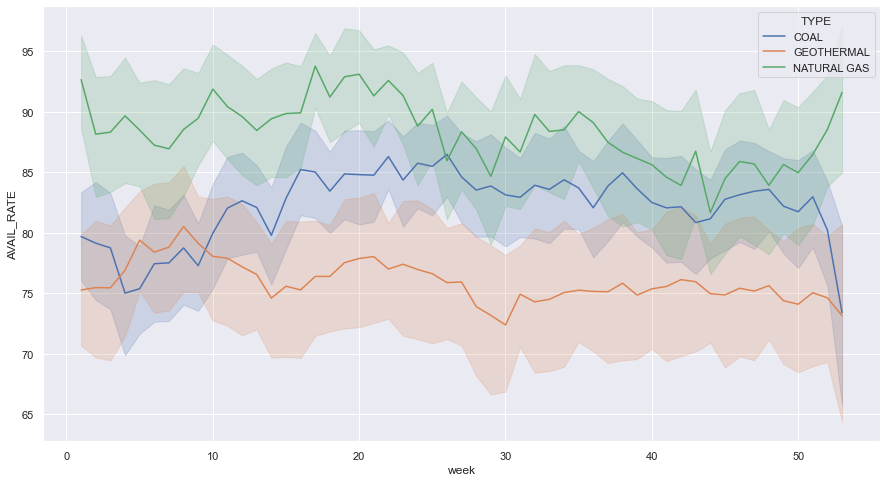

In [85]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.lineplot(data = a_rate_week, x = "week", y = "AVAIL_RATE", hue = "TYPE")

<AxesSubplot:xlabel='week', ylabel='AVAIL_RATE'>

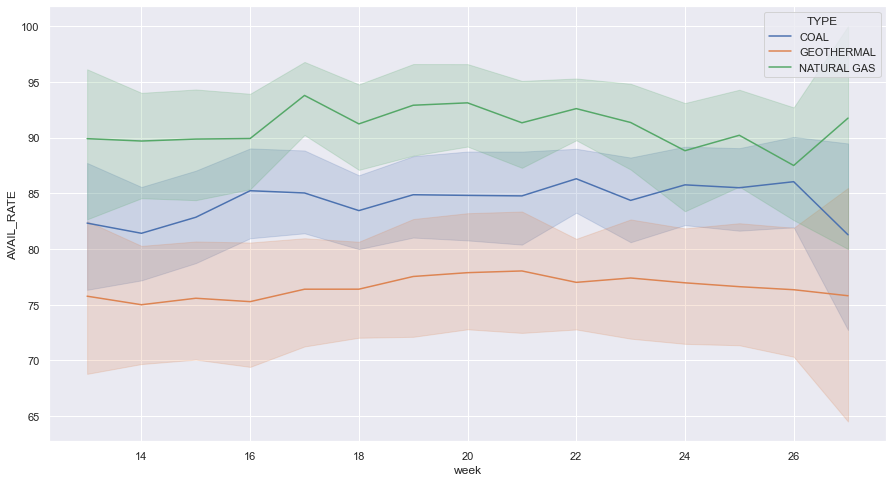

In [86]:
sns.lineplot(data = a_rate_week_q2, x = "week", y = "AVAIL_RATE", hue = "TYPE")

In [ ]:
#d["1SUAL_G02"]

In [ ]:
for name in baseloads:
#    data = a_rate_month.query()
    print(name)
    chart = sns.lineplot(
        data = a_rate_month.query(f"TYPE == '{name}'"),
        x = "MONTH",
        y = "AVAIL_RATE",
        hue = "YEAR"
    )
    plt.show()

In [ ]:
for name in baseloads:
#    data = a_rate_month.query()
    print(name)
    chart = sns.lineplot(
        data = a_rate_week_q2.query(f"TYPE == '{name}'"),
        x = "week",
        y = "AVAIL_RATE",
        hue = "YEAR"
    )
    plt.show()

In [ ]:
for name in baseloads:
#    data = a_rate_month.query()
    print(name)
    chart = sns.lineplot(
        data = a_rate_month_q2.query(f"TYPE == '{name}'"),
        x = "YEAR",
        y = "AVAIL_RATE",
        hue = "MONTH"
    )
    plt.show()

In [ ]:
for name in baseloads:
#    data = a_rate_month.query()
    print(name)
    chart = sns.lineplot(
        data = a_rate_month.query(f"TYPE == '{name}'"),
        x = "YR_MONTH",
        y = "AVAIL_RATE",
        #err_style = None
    )
    plt.show()

In [ ]:
for name in baseloads:
#    data = a_rate_month.query()
    print(name)
    chart = sns.lineplot(
        data = a_rate_q2.query(f"TYPE == '{name}'"),
        x = "YR_MONTH",
        y = "AVAIL_RATE",
        #err_style = None
    )
    plt.show()

### Graphing Availability Rate by  SUBTYPE

In [ ]:
baseload_subtype = a_rate_month["SUBTYPE"].unique()

In [ ]:
baseload_subtype

In [ ]:
for name in baseload_subtype:
    print(name)
    chart = sns.lineplot(
        data = a_rate_month.query(f"SUBTYPE == '{name}'"),
        x = "YR_MONTH",
        y = "AVAIL_RATE"
        #err_style = None
    )
    plt.show()

### Q2 Months Average Availability Rate by Subtype
Observing for any clear patterns or trends

In [ ]:
for name in baseload_subtype:
    print(name)
    chart = sns.lineplot(
        data = a_rate_q2.query(f"SUBTYPE == '{name}'"),
        x = "YR_MONTH",
        y = "AVAIL_RATE",
        #err_style = None
    )
    plt.show()

### Q2 Months Average Availability Rate by Subtype, Month

In [ ]:
for name in baseload_subtype:
    print(name)
    chart = sns.lineplot(
        data = a_rate_q2.query(f"SUBTYPE == '{name}'"),
        x = "YEAR",
        y = "AVAIL_RATE",
        hue = "MONTH"
        #err_style = None
    )
    plt.show()

### Average Availability Rate by Plant, Weekly
#### Week 13 - 27 is Q2

In [ ]:
for name in baseload_resource:
    print(name)
    chart = sns.lineplot(
        data = a_rate_week.query(f"RESOURCE_NAME == '{name}'"),
        x = "week",
        y = "AVAIL_RATE",
#        hue = "YEAR"
    )
    plt.show()

## Seasonal Naive Method
Just taking the availability rates form the last season so 2021 Q2

In [87]:
a_rate_2021_q2 = a_rate_week_q2[(a_rate_week_q2['YEAR']==2021)]

In [88]:
a_rate_2021_q2.head()

,grid,CLASS,TYPE,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,YR_MONTH,YEAR,MONTH,week,AVAIL_RATE
445,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2021-04-01,2021,4,13,100.00
446,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2021-04-01,2021,4,14,100.00
447,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2021-04-01,2021,4,15,100.00
448,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2021-04-01,2021,4,16,100.00
449,LUZON,EMBEDDED,COAL,Pulvurized Sub Critical Coal,8.00,70.00,1PETRON_G01,2021-04-01,2021,4,17,100.00


### Aggregating Average Availability BY TYPE, Q2

In [89]:
cm = sns.light_palette("blue", as_cmap=True)

In [90]:
a_rate_32 = (a_rate_2021_q2.groupby(['TYPE','MONTH'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_32.style.background_gradient(cmap=cm)

,TYPE,MONTH,AVAIL_RATE
0,COAL,4,84.136008
1,COAL,5,88.800913
2,COAL,6,86.101240
3,GEOTHERMAL,4,83.100907
4,GEOTHERMAL,5,88.950302
5,GEOTHERMAL,6,88.420631
6,NATURAL GAS,4,95.349567
7,NATURAL GAS,5,98.281926
8,NATURAL GAS,6,94.295849


### Aggregating Average Availability BY TYPE, Q2 WEEKS

In [91]:
a_rate_33 = (a_rate_2021_q2.groupby(['TYPE','MONTH','week'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_33.style.background_gradient(cmap=cm)

,TYPE,MONTH,week,AVAIL_RATE
0,COAL,4,13,83.333333
1,COAL,4,14,82.688278
2,COAL,4,15,85.134712
3,COAL,4,16,85.842986
4,COAL,4,17,83.680556
5,COAL,5,17,82.500000
6,COAL,5,18,85.833333
7,COAL,5,19,89.852608
8,COAL,5,20,91.258503
9,COAL,5,21,91.534392


### Aggregating Average Availability BY SUBTYPE

In [92]:
a_rate_41 = (a_rate_2021_q2.groupby(['SUBTYPE'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_41.style.background_gradient(cmap=cm)

,SUBTYPE,AVAIL_RATE
0,Binary,80.198413
1,Circularized Fluidized Bed (CFB) Coal Co-generation,0.000000
2,Circulating Fluidized Bed (CFB) Coal,96.856014
3,Combined Cycle Gas Turbine (CCGT),96.676046
4,Open Cycle Gas Turbine (OCGT),94.286148
5,Pulvurized Sub Critical Coal,77.359176
6,Single Flash,86.518211
7,Single Flash/Double Flash/ Binary/Combined Cycle,100.000000
8,Super Critical Coal,100.000000


### Aggregating Average Availability BY SUBTYPETYPE, Q2 

In [93]:
a_rate_42 = (a_rate_2021_q2.groupby(['SUBTYPE', 'MONTH'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_42.style.background_gradient(cmap=cm)

,SUBTYPE,MONTH,AVAIL_RATE
0,Binary,4,58.571429
1,Binary,5,87.202381
2,Binary,6,96.726190
3,Circularized Fluidized Bed (CFB) Coal Co-generation,4,0.000000
4,Circularized Fluidized Bed (CFB) Coal Co-generation,5,0.000000
5,Circularized Fluidized Bed (CFB) Coal Co-generation,6,0.000000
6,Circulating Fluidized Bed (CFB) Coal,4,96.687870
7,Circulating Fluidized Bed (CFB) Coal,5,98.742768
8,Circulating Fluidized Bed (CFB) Coal,6,94.474721
9,Combined Cycle Gas Turbine (CCGT),4,95.000000


### Aggregating Average Availability BY SUBTYPE, Q2 WEEKS

In [94]:
a_rate_43 = (a_rate_2021_q2.groupby(['SUBTYPE','MONTH','week'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_43.style.background_gradient(cmap=cm)

,SUBTYPE,MONTH,week,AVAIL_RATE
0,Binary,4,13,0.000000
1,Binary,4,14,32.738095
2,Binary,4,15,72.023810
3,Binary,4,16,88.095238
4,Binary,4,17,100.000000
5,Binary,5,17,62.500000
6,Binary,5,18,60.714286
7,Binary,5,19,100.000000
8,Binary,5,20,100.000000
9,Binary,5,21,100.000000


### Aggregating Average Availability BY RESOURCE NAME

In [95]:
a_rate_51 = (a_rate_2021_q2.groupby(['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed','RESOURCE_NAME'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_51.style.background_gradient(cmap=cm)

,SUBTYPE,YEARS_COMMISSIONED,MW_installed,RESOURCE_NAME,AVAIL_RATE
0,Binary,42.000000,6.000000,3ORMAT_G01,80.198413
1,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,1UPPC_G01,0.000000
2,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,5THVI_U02,89.284254
3,Circulating Fluidized Bed (CFB) Coal,2.000000,150.000000,1SMC_G04,100.000000
4,Circulating Fluidized Bed (CFB) Coal,2.000000,176.200000,5THVI_U01,90.000000
5,Circulating Fluidized Bed (CFB) Coal,3.000000,150.000000,1SMC_G02,100.000000
6,Circulating Fluidized Bed (CFB) Coal,3.000000,150.000000,1SMC_G03,99.801587
7,Circulating Fluidized Bed (CFB) Coal,4.000000,72.000000,1ANDA_G01,99.960317
8,Circulating Fluidized Bed (CFB) Coal,4.000000,135.000000,8PALM_G01,99.841270
9,Circulating Fluidized Bed (CFB) Coal,4.000000,150.000000,1SMC_G01,100.000000


### Aggregating Average Availability BY RESOURCE NAME, Q2

In [96]:
a_rate_52 = (a_rate_2021_q2.groupby(['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'MONTH','RESOURCE_NAME'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_52.style.background_gradient(cmap=cm)

,SUBTYPE,YEARS_COMMISSIONED,MW_installed,MONTH,RESOURCE_NAME,AVAIL_RATE
0,Binary,42.000000,6.000000,4,3ORMAT_G01,58.571429
1,Binary,42.000000,6.000000,5,3ORMAT_G01,87.202381
2,Binary,42.000000,6.000000,6,3ORMAT_G01,96.726190
3,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,4,1UPPC_G01,0.000000
4,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,5,1UPPC_G01,0.000000
5,Circularized Fluidized Bed (CFB) Coal Co-generation,23.000000,5.000000,6,1UPPC_G01,0.000000
6,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,4,5THVI_U02,100.000000
7,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,5,5THVI_U02,100.000000
8,Circulating Fluidized Bed (CFB) Coal,1.000000,176.200000,6,5THVI_U02,59.815951
9,Circulating Fluidized Bed (CFB) Coal,2.000000,150.000000,4,1SMC_G04,100.000000


### Aggregating Average Availability BY RESOURCE_NAME, Q2 WEEKS

In [97]:
a_rate_53 = (a_rate_2021_q2.groupby(['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed', 'MONTH', 'week','RESOURCE_NAME'])['AVAIL_RATE']
                                .mean().to_frame().reset_index())
a_rate_53.style.background_gradient(cmap=cm)

,SUBTYPE,YEARS_COMMISSIONED,MW_installed,MONTH,week,RESOURCE_NAME,AVAIL_RATE
0,Binary,42.000000,6.000000,4,13,3ORMAT_G01,0.000000
1,Binary,42.000000,6.000000,4,14,3ORMAT_G01,32.738095
2,Binary,42.000000,6.000000,4,15,3ORMAT_G01,72.023810
3,Binary,42.000000,6.000000,4,16,3ORMAT_G01,88.095238
4,Binary,42.000000,6.000000,4,17,3ORMAT_G01,100.000000
5,Binary,42.000000,6.000000,5,17,3ORMAT_G01,62.500000
6,Binary,42.000000,6.000000,5,18,3ORMAT_G01,60.714286
7,Binary,42.000000,6.000000,5,19,3ORMAT_G01,100.000000
8,Binary,42.000000,6.000000,5,20,3ORMAT_G01,100.000000
9,Binary,42.000000,6.000000,5,21,3ORMAT_G01,100.000000


### Collating Tables

In [123]:
type_q2_month = a_rate_02.copy().rename(columns = {'AVAIL_RATE':'MEAN_10-21'})
type_q2_month = type_q2_month.reset_index() 
type_q2_month['MEAN_21'] = a_rate_32['AVAIL_RATE']
type_q2_month = type_q2_month.drop('index', axis =1)
type_q2_month.to_csv('datasets/cleaned/type_q2_month.csv')

In [126]:
a_rate_03 = a_rate_03.groupby(['TYPE', 'week'])['AVAIL_RATE'].mean().to_frame().reset_index()
a_rate_33 = a_rate_33.groupby(['TYPE', 'week'])['AVAIL_RATE'].mean().to_frame().reset_index()

type_q2_week = pd.merge(a_rate_03, a_rate_33,
                       on =['TYPE', 'week'],
                       how = 'left')
type_q2_week = type_q2_week.rename(columns = {'week': 'WEEK', 'AVAIL_RATE_x':'MEAN_10-21', 'AVAIL_RATE_y':'MEAN_21'})

type_q2_week = type_q2_week.to_csv('datasets/cleaned/type_q2_week.csv')

In [129]:
subtype_q2_month = a_rate_12.copy().rename(columns = {'AVAIL_RATE':'MEAN_10-21'})
subtype_q2_month = subtype_q2_month.reset_index() 
subtype_q2_month['MEAN_21'] = a_rate_42['AVAIL_RATE']
subtype_q2_month = subtype_q2_month.drop('index', axis =1)

subtype_q2_month.to_csv('datasets/cleaned/type_q2_month.csv')

In [138]:
a_rate_13 = a_rate_13.groupby(['SUBTYPE', 'week'])['AVAIL_RATE'].mean().to_frame().reset_index()
a_rate_43 = a_rate_43.groupby(['SUBTYPE', 'week'])['AVAIL_RATE'].mean().to_frame().reset_index()

subtype_q2_week = pd.merge(a_rate_13, a_rate_43,
                       on =['SUBTYPE', 'week'],
                       how = 'left')
subtype_q2_week = subtype_q2_week.rename(columns = {'week': 'WEEK', 'AVAIL_RATE_x':'MEAN_10-21', 'AVAIL_RATE_y':'MEAN_21'})

subtype_q2_week.to_csv('datasets/cleaned/type_q2_week.csv')

In [153]:
plant_q2_month = pd.merge(a_rate_22, a_rate_52,
                         on =['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed','RESOURCE_NAME', 'MONTH'])
plant_q2_month = plant_q2_month.rename(columns = {'AVAIL_RATE_x':'MEAN_10-21', 'AVAIL_RATE_y':'MEAN_21'})

plant_q2_month.to_csv('datasets/cleaned/plant_q2_month.csv')

In [157]:
a_rate_23 = a_rate_23.groupby(['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed','RESOURCE_NAME', 'week'])['AVAIL_RATE'].mean().to_frame().reset_index()
a_rate_53 = a_rate_53.groupby(['SUBTYPE','YEARS_COMMISSIONED', 'MW_installed','RESOURCE_NAME', 'week'])['AVAIL_RATE'].mean().to_frame().reset_index()

plant_q2_week = pd.merge(a_rate_23, a_rate_53,
                       on =['SUBTYPE', 'YEARS_COMMISSIONED', 'MW_installed','RESOURCE_NAME', 'week'],
                       how = 'left')
plant_q2_week = plant_q2_week.rename(columns = {'week': 'WEEK', 'AVAIL_RATE_x':'MEAN_10-21', 'AVAIL_RATE_y':'MEAN_21'})

plant_q2_week.to_csv('datasets/cleaned/plant_q2_week.csv')

### Bubble Plots

In [ ]:
df_mw = df_baseloads.groupby(['RESOURCE_NAME'])['MW_installed'].mean().to_frame().reset_index()
df_yr_comm = df_baseloads.groupby(['RESOURCE_NAME'])['YEARS_COMMISSIONED'].mean().to_frame().reset_index()

In [ ]:
a_rate_q2 = pd.merge(a_rate_q2, df_mw, 
                    left_on='RESOURCE_NAME', 
                    right_on='RESOURCE_NAME', 
                    how='left')
a_rate_week_q2 = pd.merge(a_rate_week_q2, df_mw, 
                    left_on='RESOURCE_NAME', 
                    right_on='RESOURCE_NAME', 
                    how='left')

In [ ]:
sns.scatterplot(
    data = a_rate_q2,
    x = 'YEARS_COMMISSIONED',
    y = 'AVAIL_RATE',
    hue = 'TYPE',
    size = 'MW_installed',
    sizes = (10, 300)
    )

In [ ]:
for name in baseloads:
    print(name)
    chart = sns.scatterplot(
                data = a_rate_q2.query(f"TYPE == '{name}'"),
                x = 'YEARS_COMMISSIONED',
                y = 'AVAIL_RATE',
                hue = 'SUBTYPE',
                size = 'MW_installed',
                sizes = (10, 300)
            )
    plt.show()

In [ ]:
a_rate_22 = pd.merge(a_rate_22, df_mw, 
                    left_on='RESOURCE_NAME', 
                    right_on='RESOURCE_NAME', 
                    how='left')

a_rate_22

### Bubble chart of Average Availability rate q2

In [ ]:
a_rate_22.head()

In [ ]:
for name in baseloads:
    print(name)
    chart = sns.scatterplot(
            data = a_rate_22.query(f"TYPE == '{name}'"),
            x = 'YEARS_COMMISSIONED',
            y = 'AVAIL_RATE',
            hue = 'SUBTYPE',
            size = 'MW_installed',
            sizes = (10, 300)
            )
    plt.show()

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression


In [ ]:
X = 